# Name : Abhishek N N 
# Reg.No : 20BCE1025
---
### Course : Web Mining Lab
### Code : CSE3024
---
### Faculty : Dr. Alok Chauhan
### Slot : L51-L52 AB1-605B
---
### Programme : B.Tech CSE Core
### Semester : Win – 22 - 23




In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp -a "./drive/MyDrive/6th_sem_winter_22_23/cse3024_wm/exp_5_6/." "./"

Mounted at /content/drive


# Problem 1
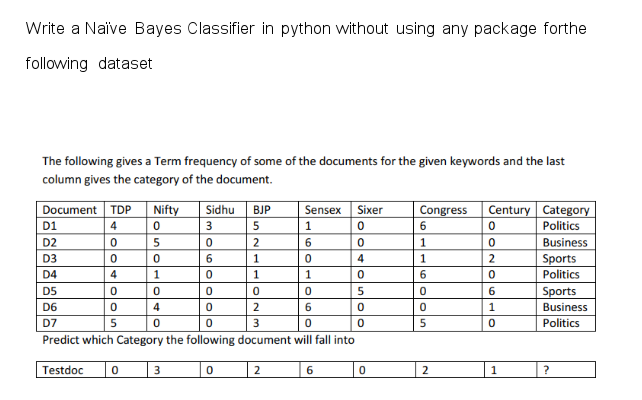

In [ ]:
# Implementing Naive Bayes Classifier for weighted attributes

from csv import reader

class NaiveBayesClassifier(object):
    def __init__(self, dataset_filename, test_component_filename):
        """Initializer function
        It takes the dataset_filename and test_componene_filename and
        reads in the contents of the file into respective objects"""
        csvfile = open(dataset_filename, 'r')
        self.dataset_ = list(reader(csvfile))
        csvfile1 = open(test_component_filename, 'r')
        self.test_component_ = list(reader(csvfile1))[0]
        print('\nRecords of the dataset')
        for row in self.dataset_:
            print(row)
        print('')
        print('Test components')
        print(self.test_component_)
        print('')
        self.modifyDataset()

    def modifyDataset(self):
        max, min = -1, 999
        for row in self.dataset_:
            for i in row[:-1]:
                i = int(i)
                if i > max:
                    max = i
                if i < min:
                    min = i
        avg = (min + max) // 2
        ## Modifying the dataset based on the avg value
        for row in self.dataset_:
            for i in range(len(row[-1])):
                value = int(row[i])
                if value < avg:
                    row[i] = 'Low'
                else:
                    row[i] = 'High'
        print('\nRecords of the modified dataset')
        for row in self.dataset_:
            print(row)
        print('')
        ## MOdifying the test component based on the avg value
        for i in range(len(self.test_component_)):
            value = int(self.test_component_[i])
            if value < avg:
                self.test_component_[i] = 'Low'
            else:
                self.test_component_[i] = 'High'
        print('Modified Test components')
        print(self.test_component_)
        print('')

    def separateDataset(self):
        """This function splits the dataset based on the number of unique
        classes available and calculates the probability of each class
        in the dataset"""
        self.total_length = len(self.dataset_) + 0.0
        self.separate_ = {}
        self.probabilities_ = {}
        for row in self.dataset_:
            if row[-1] not in self.separate_:
                self.separate_[row[-1]] = []
            self.separate_[row[-1]].append(row[:-1])
        for i in self.separate_:
            self.probabilities_[i] = (len(self.separate_[i]) + 0.0) /self.total_length

    def predict(self):
        """Function that traverses through the test_components and
        calculates the posterioir probability and finds the class it
        belongs to"""
        self.best_probability = 0
        self.best_class = ''
        for i in self.separate_:
            temp_probability = 1
            for j, item in enumerate(self.test_component_):
                count = 0
            for k in self.separate_[i]:
                if k[j] == item:
                    count = count + 1
            prob = count / len(self.separate_[i])
            temp_probability *= prob
        temp_probability *= self.probabilities_[i]
        print('Class %s probability %.4f' % (i, temp_probability))
        if temp_probability > self.best_probability:
            self.best_probability = temp_probability
            self.best_class = i
        print('\nThe given X belongs to %s with a probability of %.4f\n' %(self.best_class, self.best_probability))

## Main Code
dataset_file = input('Enter the name of the dataset file:\t')
test_component_file = input('Enter the name of the test component file:\t')
nvc = NaiveBayesClassifier(dataset_file, test_component_file)
nvc.separateDataset()
nvc.predict()

Enter the name of the dataset file:	./data/dataset.csv
Enter the name of the test component file:	./data/test_component.csv

Records of the dataset
['4', '0', '3', '5', '1', '0', '6', '0', 'Politics']
['0', '5', '0', '2', '6', '0', '1', '0', 'Business']
['0', '0', '6', '1', '0', '4', '1', '2', 'Sports']
['4', '1', '0', '1', '1', '0', '6', '0', 'Politics']
['0', '0', '0', '0', '0', '5', '0', '6', 'Sports']
['0', '4', '0', '2', '6', '0', '0', '1', 'Business']
['5', '0', '0', '3', '0', '0', '5', '0', 'Politics']

Test components
['0', '3', '0', '2', '6', '0', '2', '1']


Records of the modified dataset
['High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low', 'Politics']
['Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Business']
['Low', 'Low', 'High', 'Low', 'Low', 'High', '1', '2', 'Sports']
['High', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Politics']
['Low', 'Low', 'Low', 'Low', 'Low', 'High', '0', '6', 'Sports']
['Low', 'High', 'Low', 'Low', 'High', 'Low', 'Low

# Challenging Exercise - 1 
## Take any set of web pages, do the necessary preprocessing and build a Naïve Bayes Classifier and draw the inferences.

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score 
sns.set()

In [ ]:
# load the dataset
data = fetch_20newsgroups() # get the text
#categories
text_categories = data.target_names
# define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories) 
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories) 
print("We have {} unique classes".format(len(text_categories) ))
print("We have {} training samples".format(len(train_data.data)))
print("We have {} test samples". format(len(test_data.data)))

We have 20 unique classes
We have 11314 training samples
We have 7532 test samples


In [ ]:
print(test_data.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
# train the model using training data
model.fit(train_data.data, train_data.target) # predict the cateogories of test data 
predicted_categories = model.predict(test_data.data)

In [ ]:
print(np.array(test_data.target_names)[predicted_categories ])

['rec.autos' 'sci.crypt' 'alt.atheism' ... 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'soc.religion.christian']


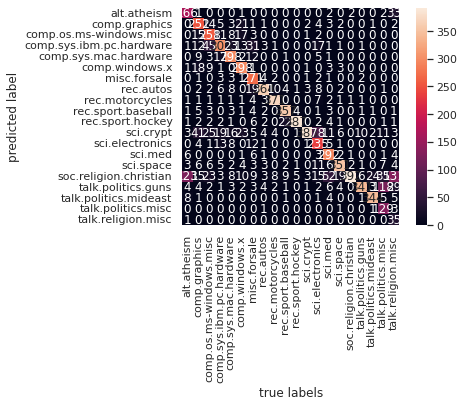

The accuracy is 0.7738980350504514


In [ ]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot = True, fmt = "d", xticklabels=train_data.target_names, yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(test_data.target, predicted_categories)))

In [ ]:
def my_predictions(my_sentence,model): 
  all_categories_names = np.array(data.target_names) 
  prediction = model.predict([my_sentence]) 
  return all_categories_names[ prediction ]
my_sentence = "jesus" 
print(my_predictions(my_sentence, model) ) 
my_sentence = "Are you an Atheist?"
print(my_predictions(my_sentence,model) )

['soc.religion.christian']
['alt.atheism']
